In [3]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt


In [2]:
import plotly as py
import plotly.graph_objs as go
# from plotly.graph_objs import *
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

In [3]:
print('I have not picked a dataset yet')

I have not picked a dataset yet


In [15]:
# read in dataset
# 
trades = pd.read_csv('https://www.kaggle.com/datasets/unitednations/global-commodity-trade-statistics?select=commodity_trade_statistics_data.csv')
#trades = pd.read_csv("assets/commodity_trade_statistics_data.csv")
trades.head()

,<!DOCTYPE html>
0,"<html lang=""en"">"
1,<head>
2,<title>Global Commodity Trade Statistics | K...
3,"<meta charset=""utf-8"" />"
4,"<meta name=""robots"" content=""index, follow..."


In [16]:
df = pd.DataFrame(trades)

In [17]:
df.isnull().sum()

<!DOCTYPE html>    0
dtype: int64

In [18]:
df.columns

Index(['<!DOCTYPE html>'], dtype='object')

In [15]:
datasizing2015 = (df['year'] == 2015)
datasizing2016 = (df['year'] == 2016)
datasizingcommodity = (df['commodity'] != 'ALL COMMODITIES')
#datasizingcommodity2 = (df['commodity'] != 'Commodities not specified according to kind')

In [16]:
dfsmall = df[(datasizing2016 | datasizing2015) & datasizingcommodity] # & datasizingcommodity2]

In [ ]:
#info on dataset
print(dfsmall.columns)
print(dfsmall.shape)

In [ ]:
dfsmall.describe()

In [ ]:
dfsmall.year.unique()

In [233]:
#separating export
dataexport = (dfsmall['flow'] == 'Export')

In [234]:
#separating import
dataimport = (dfsmall['flow'] == 'Import')

In [235]:
dfsmallexport = dfsmall[dataexport]

In [13]:
dfsmallexport = dfsmall[(dfsmall['flow']== 'Export')]

In [236]:
dfsmallimport = dfsmall[dataimport]

In [237]:
dfsmallexport.columns

Index(['country_or_area', 'year', 'comm_code', 'commodity', 'flow',
       'trade_usd', 'weight_kg', 'quantity_name', 'quantity', 'category'],
      dtype='object')

In [199]:
latest_big_exporter = dfsmallexport[:10]
latest_big_exporter.head()

,country_or_area,year,comm_code,commodity,flow,trade_usd,weight_kg,quantity_name,quantity,category
0,Afghanistan,2016,10410,"Sheep, live",Export,6088,2339.0,Number of items,51.0,01_live_animals
1,Afghanistan,2016,10420,"Goats, live",Export,3958,984.0,Number of items,53.0,01_live_animals
6,Albania,2016,10511,"Fowls, live domestic < 185 grams",Export,87581,5320.0,Number of items,115180.0,01_live_animals
10,Albania,2016,10600,"Animals, live, except farm animals",Export,584025,59521.0,Number of items,59521.0,01_live_animals
18,Albania,2015,10600,"Animals, live, except farm animals",Export,636184,80774.0,Number of items,80694.0,01_live_animals


In [200]:
#dollar value, total weight and quanity count in millions
round(dfsmallexport.groupby(['country_or_area', 'year']).sum()/1000000)

trade_usd  weight_kg  quantity
country_or_area year                                
Afghanistan     2015      478.0      651.0     651.0
                2016      483.0      605.0     606.0
Albania         2015     1485.0     3036.0    3046.0
                2016     1903.0     2770.0    2789.0
Algeria         2015    34796.0    69720.0   69646.0
...                         ...        ...       ...
Viet Nam        2015     7717.0     8030.0    7995.0
Yemen           2015       57.0       59.0      59.0
Zambia          2015      589.0     1249.0    1249.0
Zimbabwe        2015     1292.0      577.0     577.0
                2016     1382.0      757.0     757.0

[274 rows x 3 columns]

In [201]:
#dollar value, total weight and quanity count in millions
round(dfsmallimport.groupby(['country_or_area', 'year']).sum()/1000000)

trade_usd  weight_kg  quantity
country_or_area year                                
Afghanistan     2015     4418.0     7342.0    7348.0
                2016     4192.0     7145.0    7125.0
Albania         2015     3690.0     3114.0    4128.0
                2016     3827.0     3158.0    2903.0
Algeria         2015    51803.0    49984.0   47114.0
...                         ...        ...       ...
Viet Nam        2015    15477.0    18856.0   18850.0
Yemen           2015     1955.0     4745.0    4736.0
Zambia          2015      823.0      544.0     536.0
Zimbabwe        2015      640.0     1245.0    1242.0
                2016      735.0     1544.0    1542.0

[272 rows x 3 columns]

In [25]:
# unique state values
df.country_or_area.unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Anguilla', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba',
       'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Bangladesh', 'Barbados', 'Belarus', 'Belgium',
       'Belgium-Luxembourg', 'Belize', 'Benin', 'Bermuda', 'Bhutan',
       'Bolivia (Plurinational State of)', 'Bosnia Herzegovina',
       'Botswana', 'Brazil', 'Brunei Darussalam', 'Bulgaria',
       'Burkina Faso', 'Burundi', 'Cabo Verde', 'Cambodia', 'Cameroon',
       'Canada', 'Central African Rep.', 'Chad', 'Chile', 'China',
       'China, Hong Kong SAR', 'China, Macao SAR', 'Colombia', 'Comoros',
       'Congo', 'Cook Isds', 'Costa Rica', "Côte d'Ivoire", 'Croatia',
       'Cuba', 'Cyprus', 'Czech Rep.', 'Denmark', 'Djibouti', 'Dominica',
       'Dominican Rep.', 'Ecuador', 'Egypt', 'El Salvador', 'Eritrea',
       'Estonia', 'Ethiopia', 'EU-28', 'Faeroe Isds', 'Fiji', 'Finland',
       'Fmr Fed. Rep. of Germany', 'Fmr 

In [68]:
df.year.unique()

array([2016, 2008, 2015, 2014, 2013, 2012, 2011, 2010, 2009, 2007, 2006,
       2005, 2004, 2003, 2002, 2001, 2000, 1999, 1998, 1997, 1996, 1995,
       1994, 1993, 1992, 1991, 1990, 1989, 1988])

In [240]:
China = (df['country_or_area'] == 'China')

In [241]:
dfsmallchina = dfsmall[China]

/tmp/ipykernel_125/1548735632.py:1: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



In [242]:
chinaexport = pd.DataFrame(dfsmallchina.groupby(['year','country_or_area','commodity'])['trade_usd'].sum().sort_values(ascending=False))
chinaexport.reset_index(inplace=True)
chinaexport.head(20)

,year,country_or_area,commodity,trade_usd
0,2016,China,"Petroleum oils, oils from bituminous minerals,...",117604239901
1,2016,China,Gold in unwrought forms non-monetary,61699546755
2,2016,China,"Iron ore, concentrate, not iron pyrites,unaggl...",56874371658
3,2016,China,"Automobiles, spark ignition engine of 1500-300...",38343760421
4,2016,China,Soya beans,34089574635
5,2016,China,"Oils petroleum, bituminous, distillates, excep...",30552857703
6,2016,China,Copper ores and concentrates,20891429313
7,2016,China,"Fixed wing aircraft, unladen weight > 15,000 kg",20115299032
8,2016,China,Copper cathodes and sections of cathodes unwro...,19894207482
9,2016,China,Toys nes,18878012267


In [67]:
df.commodity.unique()

array(['Sheep, live', 'Goats, live',
       'Bovine animals, live pure-bred breeding', ...,
       'Collections and collectors pieces',
       'Commodities not specified according to kind', 'ALL COMMODITIES'],
      dtype=object)

In [28]:
# getting total count of unique commodities exported by country 2016
dfbycountry = dfsmallexport.groupby(['country_or_area']).size().reset_index(name='Counts')
dfbycountry.head(5)

,country_or_area,Counts
0,Afghanistan,43
1,Albania,926
2,Algeria,876
3,Antigua and Barbuda,752
4,Argentina,3354


In [29]:
# getting total count of unique commodities imported by country 2016
dfbycountry = dfsmallimport.groupby(['country_or_area']).size().reset_index(name='Counts')
dfbycountry.head(5)

,country_or_area,Counts
0,Afghanistan,70
1,Albania,2640
2,Algeria,4052
3,Antigua and Barbuda,3001
4,Argentina,4044


In [69]:
# getting top 20 countries with most unique commodities exported 2016
dfbycountry = dfsmallexport.groupby(['year','country_or_area']).size().sort_values(ascending=False).reset_index(name='Counts')
dfbycountry.head(20)

,year,country_or_area,Counts
0,2016,Australia,4183
1,2016,Belgium,3774
2,2016,Argentina,3354
3,2016,Brazil,3021
4,2016,Belarus,3018
5,2016,Bulgaria,2880
6,2016,Canada,2670
7,2016,Bahrain,2586
8,2016,China,2456
9,2016,Bosnia Herzegovina,2351


In [31]:
dfbycountry.columns

Index(['country_or_area', 'Counts'], dtype='object')

In [71]:
# getting top 20 countries with most unique commodities imported 2016
dfbycountry = dfsmallimport.groupby(['year','country_or_area']).size().sort_values(ascending=False).reset_index(name='Counts')
dfbycountry.head(20)

,year,country_or_area,Counts
0,2016,Australia,4374
1,2016,Algeria,4052
2,2016,Argentina,4044
3,2016,Belgium,3813
4,2016,Bahrain,3657
5,2016,Belarus,3549
6,2016,Armenia,3495
7,2016,Aruba,3338
8,2016,Bulgaria,3273
9,2016,Bosnia Herzegovina,3245


In [72]:
# getting bottom 20 countries with most unique commodities imported 2016
dfbycountry = dfsmallimport.groupby(['year','country_or_area']).size().sort_values(ascending=True).reset_index(name='Counts')
dfbycountry.head(20)

,year,country_or_area,Counts
0,2016,Afghanistan,70
1,2016,Togo,191
2,2016,Suriname,208
3,2016,Sierra Leone,218
4,2016,Sao Tome and Principe,246
5,2016,Solomon Isds,251
6,2016,Samoa,269
7,2016,Zimbabwe,300
8,2016,Uruguay,330
9,2016,Seychelles,362


In [238]:
#dollar value top 20 country export in billions 2016
topexporter = pd.DataFrame(dfsmallexport.groupby(['year','country_or_area'])['trade_usd'].sum().sort_values(ascending=False))
topexporter.reset_index(inplace=True)
topexporter.head(20)

,year,country_or_area,trade_usd
0,2016,China,755825130611
1,2016,Germany,441676959315
2,2016,Belgium,355210613198
3,2016,Canada,311036689942
4,2016,USA,275744599472
5,2016,France,255396945839
6,2016,Australia,189629974556
7,2016,Brazil,167670213884
8,2016,United Arab Emirates,156428313636
9,2016,"China, Hong Kong SAR",149916723186


In [74]:
topexporter.columns

Index(['year', 'country_or_area', 'trade_usd'], dtype='object')

In [36]:
topexporter.reset_index(inplace=True)

In [75]:
topexporter.columns

Index(['year', 'country_or_area', 'trade_usd'], dtype='object')

In [38]:
#dollar value bottom 20 country export in billions
bottomexporter = round(dfsmallexport.groupby(['country_or_area','year'])['trade_usd'].sum().sort_values(ascending=True)/1000000000)
bottomexporter.head(20)

country_or_area        year
Palau                  2016    0.0
Bermuda                2016    0.0
Sao Tome and Principe  2016    0.0
Samoa                  2016    0.0
Cabo Verde             2016    0.0
Antigua and Barbuda    2016    0.0
Maldives               2016    0.0
Aruba                  2016    0.0
Montenegro             2016    0.0
Solomon Isds           2016    0.0
Sierra Leone           2016    0.0
Belize                 2016    0.0
Seychelles             2016    1.0
Greenland              2016    1.0
Rwanda                 2016    1.0
Togo                   2016    1.0
Benin                  2016    1.0
Barbados               2016    1.0
Afghanistan            2016    1.0
Niger                  2016    1.0
Name: trade_usd, dtype: float64

In [128]:
#dollar value top 20 country import in billions 2016
topimporter = pd.DataFrame(dfsmallimport.groupby(['year','country_or_area'])['trade_usd'].sum().sort_values(ascending=False))
topimporter.reset_index(inplace=True)
topimporter.head(20)

,year,country_or_area,trade_usd
0,2015,EU-28,2978978028186
1,2015,USA,2516312867522
2,2015,China,2511002301458
3,2016,USA,2444609502155
4,2016,China,2371014908085
5,2015,Germany,1500005658555
6,2016,Germany,1497218159816
7,2015,Japan,907690746336
8,2016,Japan,869034237375
9,2015,France,819679427843


In [129]:
year = 2016
filteredData = topimporter.loc[topimporter['year'] == year].nlargest(n=10, columns = 'trade_usd')
print(filteredData.head(20))

    year       country_or_area      trade_usd
3   2016                   USA  2444609502155
4   2016                 China  2371014908085
6   2016               Germany  1497218159816
8   2016                 Japan   869034237375
10  2016                France   808352833602
12  2016  China, Hong Kong SAR   714860324738
13  2016        United Kingdom   699917582875
14  2016               Belgium   697761409568
18  2016                Canada   650492123269
21  2016                 India   555056233803


In [ ]:
#dollar value bottom 20 country import in billions
bottomimporter = round(dfsmallimport.groupby('country_or_area')['trade_usd'].sum().sort_values(ascending=True)/1000000000)
bottomimporter.head(20)

In [ ]:
topimporter.reset_index(inplace=True)

In [182]:
#dollar value top 20 items export in billions
topcommexport = pd.DataFrame(round(dfsmallexport.groupby(['year','commodity',])['trade_usd'].sum().sort_values(ascending=False)/1000000000))
topcommexport.reset_index(inplace=True)
topcommexport.head(20)

,year,commodity,trade_usd
0,2015,"Petroleum oils, oils from bituminous minerals,...",300.0
1,2015,"Oils petroleum, bituminous, distillates, excep...",292.0
2,2015,"Medicaments nes, in dosage",221.0
3,2016,"Petroleum oils, oils from bituminous minerals,...",177.0
4,2016,"Oils petroleum, bituminous, distillates, excep...",171.0
5,2015,"Fixed wing aircraft, unladen weight > 15,000 kg",153.0
6,2016,"Medicaments nes, in dosage",144.0
7,2016,Gold in unwrought forms non-monetary,99.0
8,2016,"Fixed wing aircraft, unladen weight > 15,000 kg",97.0
9,2015,Gold in unwrought forms non-monetary,93.0


In [183]:
#dollar value top 20 items import in billions
topcommimport = pd.DataFrame(round(dfsmallimport.groupby(['year','commodity',])['trade_usd'].sum().sort_values(ascending=False)/1000000000))
topcommimport.reset_index(inplace=True)
topcommimport.head(20)

,year,commodity,trade_usd
0,2015,"Petroleum oils, oils from bituminous minerals,...",646.0
1,2016,"Petroleum oils, oils from bituminous minerals,...",373.0
2,2015,"Oils petroleum, bituminous, distillates, excep...",332.0
3,2016,"Oils petroleum, bituminous, distillates, excep...",209.0
4,2015,"Medicaments nes, in dosage",172.0
5,2015,Gold in unwrought forms non-monetary,170.0
6,2015,"Fixed wing aircraft, unladen weight > 15,000 kg",153.0
7,2015,Natural gas in gaseous state,136.0
8,2016,"Medicaments nes, in dosage",135.0
9,2016,Gold in unwrought forms non-monetary,131.0


   year country_or_area     trade_usd
0  2016           China  755825130611
1  2016         Germany  441676959315
2  2016         Belgium  355210613198
3  2016          Canada  311036689942
4  2016             USA  275744599472


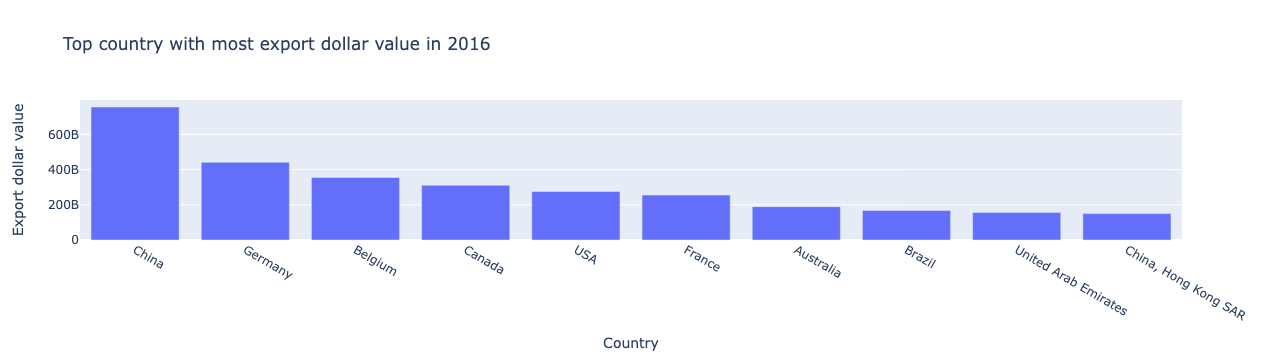

In [239]:
# Top exporter 2016

year = 2016

filteredData = topexporter.loc[topexporter['year'] == year].nlargest(n=10, columns = 'trade_usd')
print(filteredData.head(5))


topexporterdata = go.Bar(
    x=filteredData['country_or_area'],
    y=filteredData['trade_usd'],
    name=""
)

topexporterlayout = go.Layout(
    title=f'Top country with most export dollar value in {year}',
    xaxis = dict(title = 'Country'), # x-axis label
    yaxis = dict(title = 'Export dollar value'), # y-axis label

)

topexporterbar = go.Figure(data=[topexporterdata], layout=topexporterlayout)
topexporterbar



    year       country_or_area      trade_usd
3   2016                   USA  2444609502155
4   2016                 China  2371014908085
6   2016               Germany  1497218159816
8   2016                 Japan   869034237375
10  2016                France   808352833602
12  2016  China, Hong Kong SAR   714860324738
13  2016        United Kingdom   699917582875
14  2016               Belgium   697761409568
18  2016                Canada   650492123269
21  2016                 India   555056233803


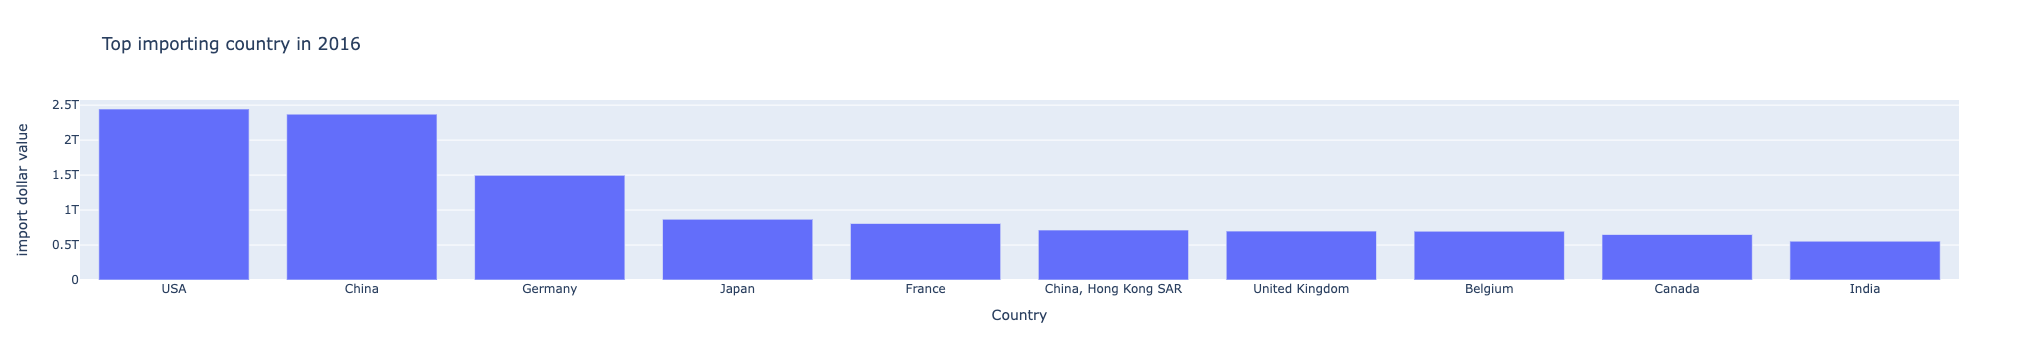

In [133]:
# Top importer 2016

year = 2016

filteredData = topimporter.loc[topimporter['year'] == year].nlargest(n=10, columns = 'trade_usd')
print(filteredData.head(20))

topimporterdata = go.Bar(
    x=filteredData['country_or_area'],
    y=filteredData['trade_usd'],
    name=""
)

topimporterlayout = go.Layout(
    title=f'Top importing country in {year}',
    xaxis = dict(title = 'Country'), # x-axis label
    yaxis = dict(title = 'import dollar value'), # y-axis label

)

topimporterbar = go.Figure(data=[topimporterdata], layout=topimporterlayout)
topimporterbar



In [181]:
# Top commodities imported dollar value

year = 2016

filteredData = topcommexport.nlargest(n=20, columns = 'trade_usd')
print(filteredData.head(20))

topcommexportdata = go.Bar(
    x=filteredData['commodity'],
    y=filteredData['trade_usd'],
    name=""
)

topcommexportlayout = go.Layout(
    title=f'Top commodity export dollar value in {year}',
    xaxis = dict(title = 'commodity'), # x-axis label
    yaxis = dict(title = 'export dollar value'), # y-axis label

)

topcommexportbar = go.Figure(data=[topcommexportdata], layout=topcommexportlayout)
topcommexport

    year                                          commodity  trade_usd
0   2015                                    ALL COMMODITIES    18175.0
1   2016                                    ALL COMMODITIES    14642.0
2   2015        Commodities not specified according to kind      753.0
3   2016        Commodities not specified according to kind      643.0
4   2015  Petroleum oils, oils from bituminous minerals,...      300.0
5   2015  Oils petroleum, bituminous, distillates, excep...      292.0
6   2015                         Medicaments nes, in dosage      221.0
7   2016  Petroleum oils, oils from bituminous minerals,...      177.0
8   2016  Oils petroleum, bituminous, distillates, excep...      171.0
9   2015    Fixed wing aircraft, unladen weight > 15,000 kg      153.0
10  2016                         Medicaments nes, in dosage      144.0
11  2016               Gold in unwrought forms non-monetary       99.0
12  2016    Fixed wing aircraft, unladen weight > 15,000 kg       97.0
13  20

,year,commodity,trade_usd
0,2015,ALL COMMODITIES,18175.0
1,2016,ALL COMMODITIES,14642.0
2,2015,Commodities not specified according to kind,753.0
3,2016,Commodities not specified according to kind,643.0
4,2015,"Petroleum oils, oils from bituminous minerals,...",300.0
...,...,...,...
9279,2016,Thyme and bay leaves,0.0
9280,2016,"Fennel seeds, juniper berries",0.0
9281,2016,"Clock movements, complete and assembled, batte...",0.0
9282,2016,"Yarn of artificial filament not sewing thread,...",0.0
